# REDES NEURONALES

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [4]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=0.5)
X,y=rus.fit_resample(X,y)
print(X.shape)
print(y.shape)

(2325, 9)
(2325,)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [9]:
y_pred = mlp.predict(X_test)

In [10]:
print(mlp.score(X_test,y_test))

0.8795698924731182


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
results = cross_val_score(mlp, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.8580645161290322
0.01703546184704822


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       309
           1       0.80      0.85      0.83       156

    accuracy                           0.88       465
   macro avg       0.86      0.87      0.87       465
weighted avg       0.88      0.88      0.88       465



In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[277  32]
 [ 24 132]]


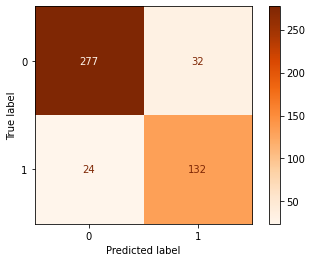

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

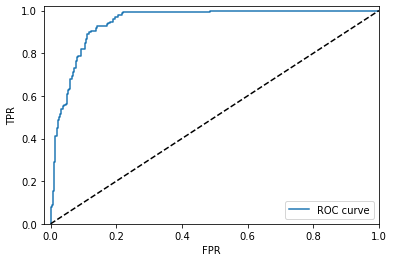

In [15]:
from sklearn.metrics import roc_curve
probs=mlp.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

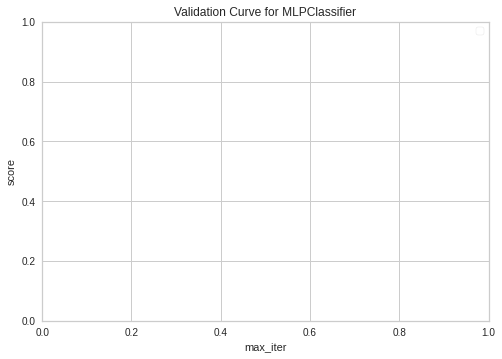

In [16]:
from yellowbrick.model_selection import ValidationCurve
h=np.arange(1,1000)
k=ValidationCurve(mlp,param_name='max_iter', param_range=h, cv=kfold, scoring='f1_weighted',n_jobs=4)
# k.fit(X,y)
k.show();

In [17]:
len(mlp.coefs_[0])

9

In [18]:
len(mlp.intercepts_[0])

10